In [157]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

## 재해자

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/최종프로젝트/자료/eda자료/산업재해_재해자.csv', encoding='euc-kr')
df1

,특성별(1),특성별(2),2017,2018,2019
0,전체,소계,52476,59999,67370
1,산업별,제조업,16463,18283,20251
2,산업별,건설업,13539,14659,15178
3,산업별,숙박 및 음식점업,2830,2873,3441
4,산업별,도매 및 소매업,2270,2351,2716
...,...,...,...,...,...
118,작업내용별,그 밖의 건설관련 작업,4409,5399,5491
119,작업내용별,기계기구 설비 설치·보전작업,3690,4533,5132
120,작업내용별,해당없음,1990,2530,2796
121,작업내용별,채광 벌목 등의 작업,1131,1046,1211


In [3]:
df1.columns = ['특성별', '소분류', '2017', '2018', '2019']

In [4]:
np.unique(df1.특성별)

array(['규모별', '기인물별', '발생형태별', '산업별', '성별', '연령별', '작업내용별', '작업지역·공정별',
       '전체', '직종별'], dtype=object)

### 규모별 eda

In [5]:
df1_scale = df1.drop('특성별', axis=1)[df1.특성별 == '규모별']

In [6]:
df1_scale = df1_scale.replace('-', np.nan)
df1_scale

,소분류,2017,2018,2019
23,5인 미만,10489,12123,13393
24,5~9인,7081,7955,8510
25,10~15인,NaN,NaN,6308
26,16~29인,NaN,NaN,8734
27,10~29인,11051,13858,NaN
28,30~49인,4717,6025,6274
29,50~99인,4482,6008,6750
30,100~199인,NaN,NaN,5354
31,200~299인,NaN,NaN,2200
32,100~299인,4050,6145,NaN


In [7]:
df1_scale.dropna(inplace=True) # nan가 있는 행 제거
df1_scale = df1_scale.iloc[:-1] # 마지막 소분류가 분류불능인 행 제거
df1_scale

,소분류,2017,2018,2019
23,5인 미만,10489,12123,13393
24,5~9인,7081,7955,8510
28,30~49인,4717,6025,6274
29,50~99인,4482,6008,6750
33,300~499인,1157,1805,2026
34,500~999인,818,1321,2187


In [8]:
df1_scale.set_index('소분류', inplace=True)
df1_scale.index = ['소', '소', '중', '중', '대', '대']
df1_scale

,2017,2018,2019
소,10489,12123,13393
소,7081,7955,8510
중,4717,6025,6274
중,4482,6008,6750
대,1157,1805,2026
대,818,1321,2187


In [9]:
df1_scale = df1_scale.astype('int')

In [10]:
df1_scale.reset_index(inplace=True)

In [11]:
df1_scale.columns = ['규모', '2017', '2018', '2019']
df1_scale.groupby('규모').sum().sum(axis=1)

규모
대     9314
소    59551
중    34256
dtype: int64

In [12]:
df1_scale.groupby('규모').sum().reindex(index=['소', '중', '대'])

,2017,2018,2019
규모,,,
소,17570,20078,21903
중,9199,12033,13024
대,1975,3126,4213


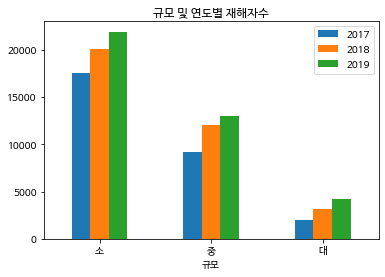

In [13]:
df1_scale.groupby('규모').sum().reindex(index=['소', '중', '대']).plot.bar(rot=0)
plt.title('규모 및 연도별 재해자수')
plt.show()

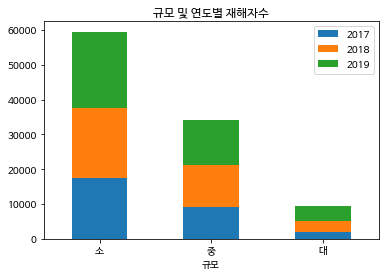

In [14]:
df1_scale.groupby('규모').sum().reindex(index=['소', '중', '대']).plot.bar(stacked=True, rot=0)
plt.title('규모 및 연도별 재해자수')
plt.show()

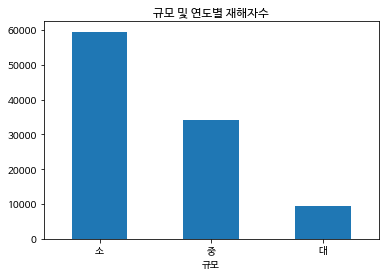

In [15]:
df1_scale.groupby('규모').sum().sum(axis=1).reindex(index=['소', '중', '대']).plot.bar(rot=0)
plt.title('규모 및 연도별 재해자수')
plt.show()

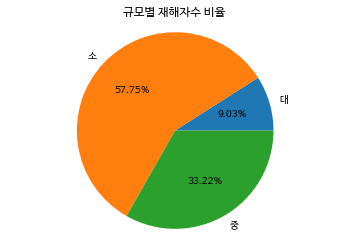

In [16]:
df1_scale.groupby('규모').sum().sum(axis=1).plot.pie(autopct = '%.2f%%') # autopct: 부채꼴 안에 표시될 숫자의 형식을 지정
plt.title('규모별 재해자수 비율')
plt.axis('equal') # 원형
plt.ylabel('')
plt.show()

### 발생형태별 eda

In [17]:
df1_form = df1.drop('특성별', axis=1)[df1.특성별 == '발생형태별']

In [18]:
df1_form = df1_form[:-3]

In [19]:
df1_form.set_index('소분류', inplace=True)
df1_form = df1_form.astype('int')
df1_form

,2017,2018,2019
소분류,,,
넘어짐(사람이 미끄러지거나 넘어짐),11293,14082,16021
끼임(기계설비에 끼이거나 감김),8049,8560,9017
부딪힘(물체에 부딪힘),5297,6466,7434
떨어짐(높이가 있는 곳에서 사람이 떨어짐),7633,7390,7249
불균형 및 무리한 동작,3559,4368,5791
절단·베임·찔림,4596,4941,5782
물체에 맞음(날아오거나 떨어진 물체에 맞음),4095,4422,4793
사업장외 교통사고,1037,1686,1710
이상온도 접촉,1271,1426,1654


In [20]:
df1_form.sum(axis=1).sort_values(ascending=False)

소분류
넘어짐(사람이 미끄러지거나 넘어짐)         41396
끼임(기계설비에 끼이거나 감김)           25626
떨어짐(높이가 있는 곳에서 사람이 떨어짐)     22272
부딪힘(물체에 부딪힘)                19197
절단·베임·찔림                    15319
불균형 및 무리한 동작                13718
물체에 맞음(날아오거나 떨어진 물체에 맞음)    13310
사업장외 교통사고                    4433
이상온도 접촉                      4351
기타                           2863
깔림·뒤집힘(물체의 쓰러짐이나 뒤집힘)        2816
사업장내 교통사고                     933
폭발·파열                         785
화학물질누출·접촉                     770
화재                            613
감전                            550
무너짐(건축물이나 쌓여진 물체가 무너짐)        502
동물상해                          490
체육행사 등의 사고                    466
폭력행위                          337
빠짐·익사                         139
산소결핍                           44
dtype: int64

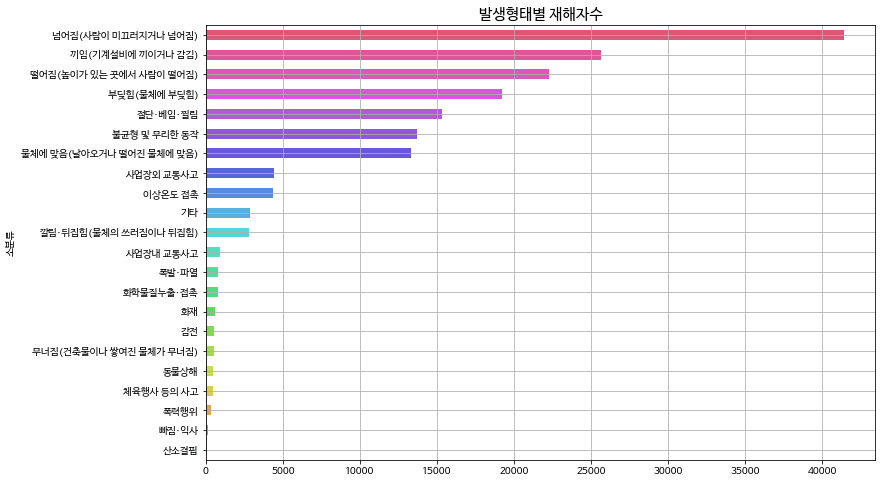

In [21]:
colors = sns.color_palette('hls',len(df1_form)) ## 색상 지정
df1_form.sum(axis=1).sort_values().plot(kind='barh', grid=True, figsize=(12,8), color=colors)
plt.title('발생형태별 재해자수', size=15)
plt.show()

## 사망자

In [22]:
df2 = pd.read_csv('/content/drive/MyDrive/최종프로젝트/자료/eda자료/산업재해_사망자.csv', encoding='euc-kr')
df2

,특성별(1),특성별(2),2017,2018,2019
0,전체,소계,876,836,808
1,산업별,건설업,380,310,330
2,산업별,제조업,206,209,189
3,산업별,운수 및 창고업,32,36,35
4,산업별,도매 및 소매업,32,40,27
...,...,...,...,...,...
110,작업내용별,물체의 가공 취급 작업,60,66,52
111,작업내용별,해당없음,28,49,39
112,작업내용별,채광 벌목 등의 작업,29,20,38
113,작업내용별,행정 의료 등 서비스작업,28,24,23


In [23]:
df2.columns = ['특성별', '소분류', '2017', '2018', '2019']

In [24]:
np.unique(df2.특성별)

array(['규모별', '기인물별', '발생형태별', '산업별', '성별', '연령별', '작업내용별', '작업지역·공정별',
       '전체', '직종별'], dtype=object)

### 규모별 eda

In [25]:
df2_scale = df2.drop('특성별', axis=1)[df2.특성별 == '규모별']

In [26]:
df2_scale = df2_scale.replace('-', np.nan)
df2_scale

,소분류,2017,2018,2019
21,5인 미만,214,232,270
22,5~9인,140,116,123
23,10~15인,NaN,NaN,77
24,16~29인,NaN,NaN,92
25,10~29인,194,186,NaN
26,30~49인,62,66,52
27,50~99인,59,68,47
28,100~199인,NaN,NaN,54
29,200~299인,NaN,NaN,17
30,100~299인,70,82,NaN


In [27]:
df2_scale.dropna(inplace=True) # nan가 있는 행 제거
df2_scale = df2_scale.iloc[:-1] # 마지막 소분류가 분류불능인 행 제거
df2_scale

,소분류,2017,2018,2019
21,5인 미만,214,232,270
22,5~9인,140,116,123
26,30~49인,62,66,52
27,50~99인,59,68,47
31,300~499인,16,22,19
32,500~999인,12,17,20


In [28]:
df2_scale.set_index('소분류', inplace=True)
df2_scale.index = ['소', '소', '중', '중', '대', '대']
df2_scale

,2017,2018,2019
소,214,232,270
소,140,116,123
중,62,66,52
중,59,68,47
대,16,22,19
대,12,17,20


In [29]:
df2_scale = df2_scale.astype('int')

In [30]:
df2_scale.reset_index(inplace=True)

In [31]:
df2_scale.columns = ['규모', '2017', '2018', '2019']
df2_scale.groupby('규모').sum().sum(axis=1)

규모
대     106
소    1095
중     354
dtype: int64

In [32]:
df2_scale.groupby('규모').sum().reindex(index=['소', '중', '대'])

,2017,2018,2019
규모,,,
소,354,348,393
중,121,134,99
대,28,39,39


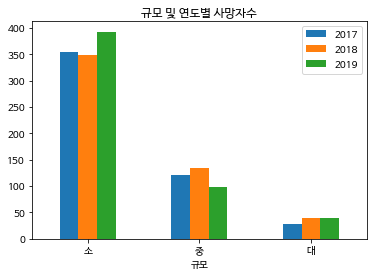

In [33]:
df2_scale.groupby('규모').sum().reindex(index=['소', '중', '대']).plot.bar(rot=0)
plt.title('규모 및 연도별 사망자수')
plt.show()

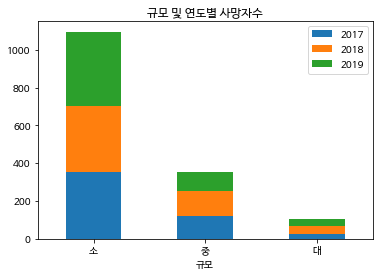

In [34]:
df2_scale.groupby('규모').sum().reindex(index=['소', '중', '대']).plot.bar(stacked=True, rot=0)
plt.title('규모 및 연도별 사망자수')
plt.show()

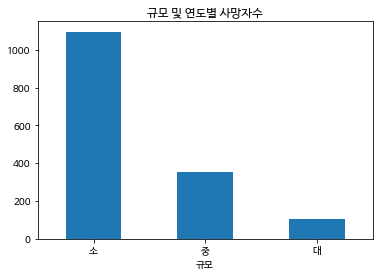

In [35]:
df2_scale.groupby('규모').sum().sum(axis=1).reindex(index=['소', '중', '대']).plot.bar(rot=0)
plt.title('규모 및 연도별 사망자수')
plt.show()

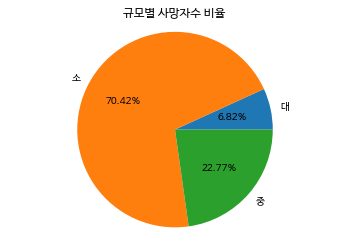

In [36]:
df2_scale.groupby('규모').sum().sum(axis=1).plot.pie(autopct = '%.2f%%') # autopct: 부채꼴 안에 표시될 숫자의 형식을 지정
plt.title('규모별 사망자수 비율')
plt.axis('equal') # 원형
plt.ylabel('')
plt.show()

### 발생형태별 eda

In [37]:
df2_form = df2.drop('특성별', axis=1)[df2.특성별 == '발생형태별']

In [38]:
df2_form = df2_form[:-3]

In [39]:
df2_form.set_index('소분류', inplace=True)
df2_form = df2_form.astype('int')
df2_form

,2017,2018,2019
소분류,,,
떨어짐(높이가 있는 곳에서 사람이 떨어짐),327,293,283
끼임(기계설비에 끼이거나 감김),86,87,83
부딪힘(물체에 부딪힘),58,48,66
깔림·뒤집힘(물체의 쓰러짐이나 뒤집힘),75,52,56
물체에 맞음(날아오거나 떨어진 물체에 맞음),70,51,55
사업장외 교통사고,60,71,55
넘어짐(사람이 미끄러지거나 넘어짐),27,23,26
기타,16,28,20
폭발·파열,9,11,18


In [40]:
df2_form.sum(axis=1).sort_values(ascending=False)

소분류
떨어짐(높이가 있는 곳에서 사람이 떨어짐)     903
끼임(기계설비에 끼이거나 감김)           256
사업장외 교통사고                   186
깔림·뒤집힘(물체의 쓰러짐이나 뒤집힘)       183
물체에 맞음(날아오거나 떨어진 물체에 맞음)    176
부딪힘(물체에 부딪힘)                172
넘어짐(사람이 미끄러지거나 넘어짐)          76
기타                           64
감전                           47
무너짐(건축물이나 쌓여진 물체가 무너짐)       45
사업장내 교통사고                    43
화재                           40
폭발·파열                        38
빠짐·익사                        27
산소결핍                         20
이상온도 접촉                      17
화학물질누출·접촉                    16
절단·베임·찔림                     15
불균형 및 무리한 동작                 12
dtype: int64

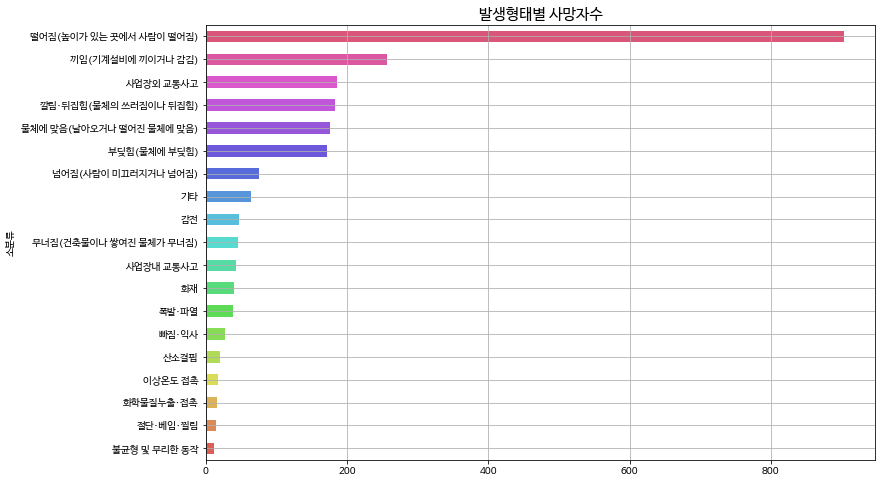

In [41]:
colors = sns.color_palette('hls',len(df2_form)) ## 색상 지정
df2_form.sum(axis=1).sort_values().plot(kind='barh', grid=True, figsize=(12,8), color=colors)
plt.title('발생형태별 사망자수', size=15)
plt.show()